In [ ]:
!pip install tslearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 7.0 MB/s eta 0:00:00


In [ ]:
from tslearn.clustering import TimeSeriesKMeans

In [ ]:
!pip install hmmlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.1/161.1 kB 4.6 MB/s eta 0:00:00


In [ ]:
import yfinance as yf
from datetime import date
import numpy as np
import pandas as pd
from hmmlearn import hmm
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 12]

In [ ]:
vix_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,14.070000,14.070000,12.850000,12.850000,12.850000,0
2017-01-04,12.780000,12.800000,11.630000,11.850000,11.850000,0
2017-01-05,11.960000,12.090000,11.400000,11.670000,11.670000,0
2017-01-06,11.700000,11.740000,10.980000,11.320000,11.320000,0
2017-01-09,11.710000,12.080000,11.460000,11.560000,11.560000,0
...,...,...,...,...,...,...
2022-12-23,22.170000,22.639999,20.780001,20.870001,20.870001,0
2022-12-27,21.670000,22.799999,21.590000,21.650000,21.650000,0
2022-12-28,21.469999,22.260000,20.959999,22.139999,22.139999,0


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import plotly.graph_objs as go

start_date = '2017-01-01'
end_date = '2023-01-01'
reliance = yf.download('RELIANCE.NS', start=start_date, end=end_date)

vix_symbol = "^VIX"
vix_data = yf.download(vix_symbol, start_date, end_date)

# Display the first few rows of the data
print(vix_data.head())


high_9 = reliance['High'].rolling(window=9).max()
low_9 = reliance['Low'].rolling(window=9).min()
tenkan_sen = (high_9 + low_9) / 2

high_26 = reliance['High'].rolling(window=26).max()
low_26 = reliance['Low'].rolling(window=26).min()
kijun_sen = (high_26 + low_26) / 2

senkou_span_a = ((tenkan_sen + kijun_sen) / 2).shift(26)
senkou_span_b = ((high_52 := reliance['High'].rolling(window=52).max()) + (low_52 := reliance['Low'].rolling(window=52).min())) / 2
senkou_span_b = senkou_span_b.shift(26)

chikou_span = reliance['Close'].shift(-26)

ema_12 = reliance['Close'].ewm(span=12, adjust=False).mean()
ema_26 = reliance['Close'].ewm(span=26, adjust=False).mean()
macd = ema_12 - ema_26
macd_signal = macd.ewm(span=9, adjust=False).mean()

bullish = (reliance['Close'] > senkou_span_a) & (reliance['Close'] > senkou_span_b) & (tenkan_sen > kijun_sen) & (macd > macd_signal)
bearish = (reliance['Close'] < senkou_span_a) & (reliance['Close'] < senkou_span_b) & (tenkan_sen < kijun_sen) & (macd < macd_signal)
sideways = ~(bullish | bearish)  # If it's neither bullish nor bearish, it's considered sideways

# Create a new column 'moment' and assign 0 for bearish, 1 for bullish, and 2 for sideways
reliance['moment'] = np.where(bullish, 1, np.where(bearish, 0, 2))

# Create traces for the plot
cloud_trace_a = go.Scatter(x=reliance.index, y=senkou_span_a, mode='lines', name='Senkou Span A', line=dict(color='lightgreen'))
cloud_trace_b = go.Scatter(x=reliance.index, y=senkou_span_b, mode='lines', name='Senkou Span B', line=dict(color='lightcoral'), fill='tonexty')

# Highlight bullish, bearish, and sideways regions
bullish_trace = go.Scatter(x=reliance.index, y=np.where(bullish, reliance['Close'], np.nan), mode='lines', name='Bullish', line=dict(color='green'), opacity=0.5)
bearish_trace = go.Scatter(x=reliance.index, y=np.where(bearish, reliance['Close'], np.nan), mode='lines', name='Bearish', line=dict(color='red'), opacity=0.5)
sideways_trace = go.Scatter(x=reliance.index, y=np.where(sideways, reliance['Close'], np.nan), mode='lines', name='Sideways', line=dict(color='orange'), opacity=0.5)

# Combine all traces into a list
data = [cloud_trace_a, cloud_trace_b, bullish_trace, bearish_trace, sideways_trace]

# Create the layout for the plot
layout = go.Layout(
    title='Reliance Stock Price with Ichimoku Cloud, Bullish, Bearish, and Sideways Regions',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Price (INR)'),
    showlegend=True
)

# Create the figure and plot it
fig = go.Figure(data=data, layout=layout)
fig.show()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


             Open   High    Low  Close  Adj Close  Volume
Date                                                     
2017-01-03  14.07  14.07  12.85  12.85      12.85       0
2017-01-04  12.78  12.80  11.63  11.85      11.85       0
2017-01-05  11.96  12.09  11.40  11.67      11.67       0
2017-01-06  11.70  11.74  10.98  11.32      11.32       0
2017-01-09  11.71  12.08  11.46  11.56      11.56       0


[*********************100%***********************]  1 of 1 completed


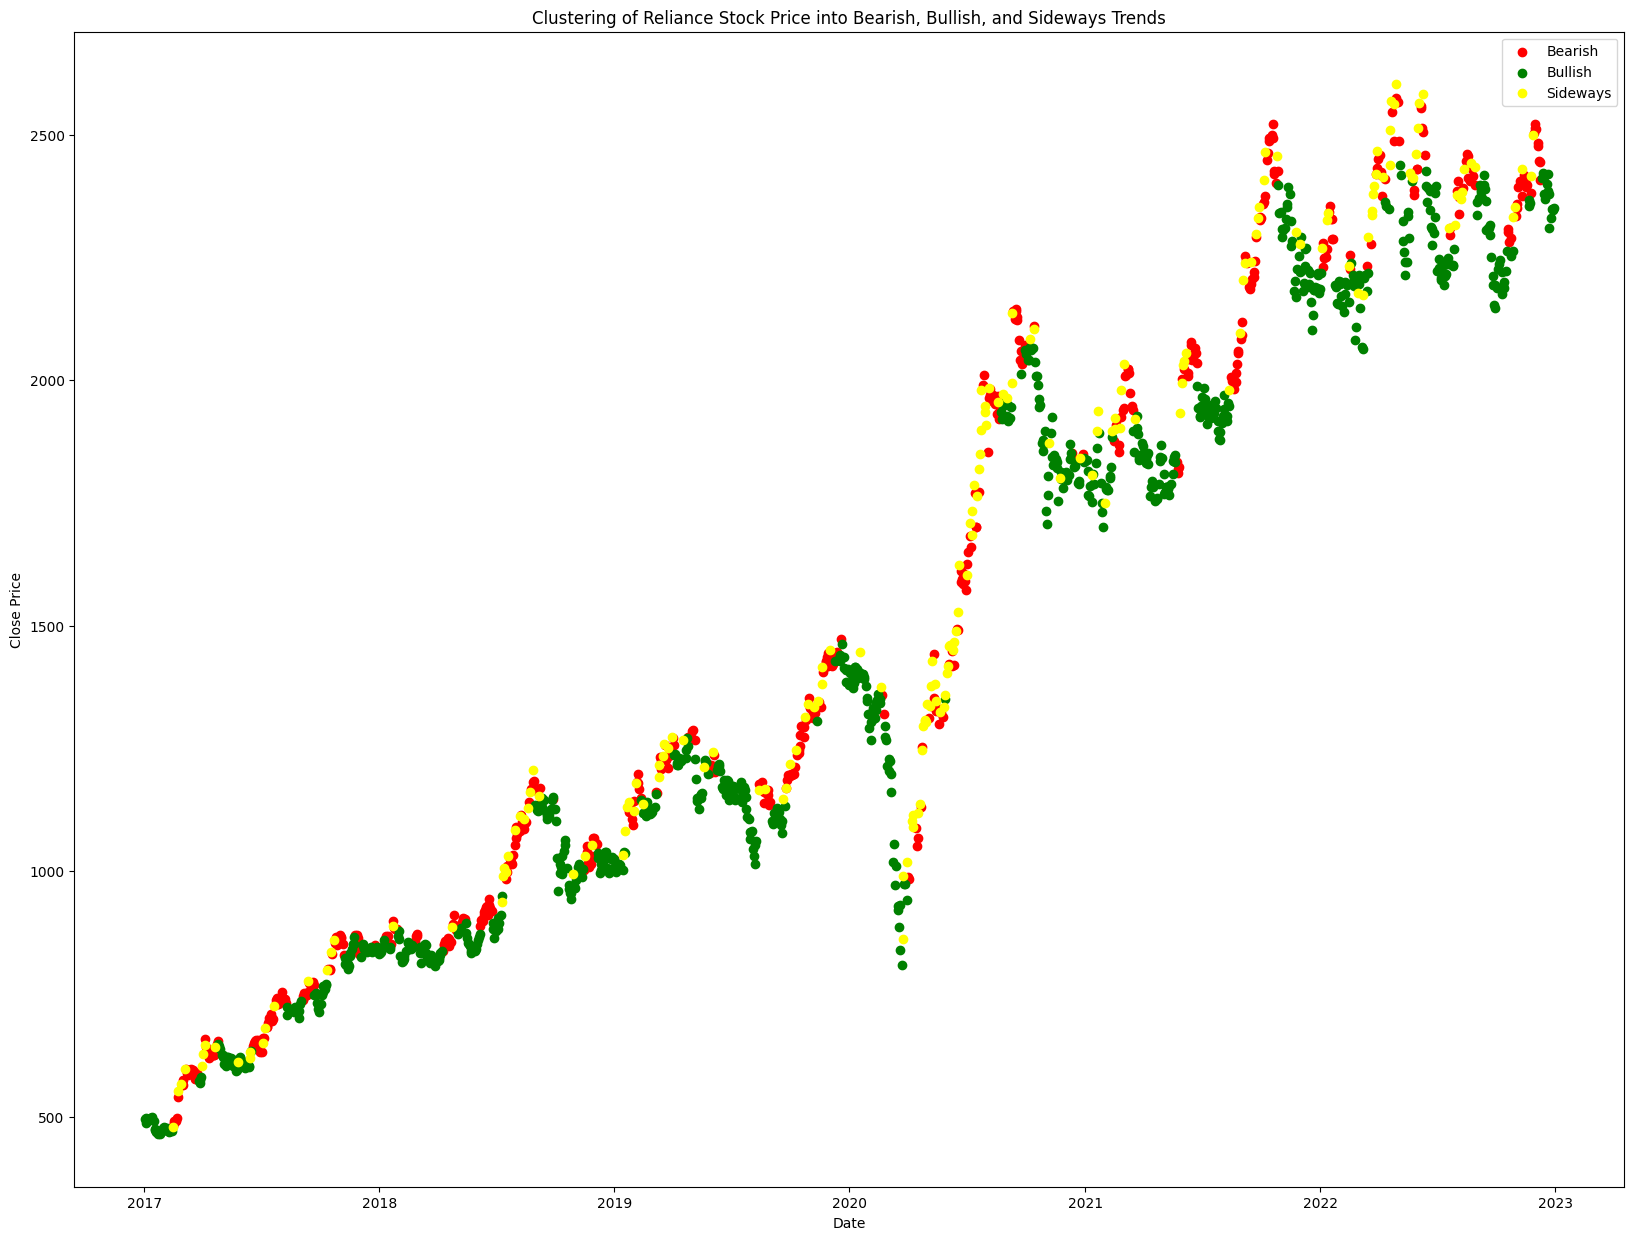

In [ ]:
from tslearn.clustering import TimeSeriesKMeans
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Download Reliance stock data from Yahoo Finance
start_date = '2017-01-01'
end_date = '2023-01-01'
reliance = yf.download('RELIANCE.NS', start=start_date, end=end_date)

# Feature Engineering
p = reliance.copy()
p['return'] = p['Close'].pct_change()  # Price returns
p['momentum'] = p['Close'] - p['Close'].shift(10)  # Momentum over 10 days
p['short_ma'] = p['Close'].rolling(window=20).mean()  # 20-day moving average
p['long_ma'] = p['Close'].rolling(window=50).mean()  # 50-day moving average
p['trend'] = p['short_ma'] - p['long_ma']  # Trend difference
p['volatility'] = p['Close'].rolling(window=30).std()  # Volatility
p['rsi'] = 100 - (100 / (1 + p['Close'].diff(1).apply(lambda x: max(x, 0)).rolling(window=14).mean() / p['Close'].diff(1).apply(lambda x: abs(min(x, 0))).rolling(window=14).mean()))  # RSI
p['VIX']=vix_data['Close']
# Combine features into an array
features = np.column_stack([p['return'].fillna(0), p['momentum'].fillna(0), p['trend'].fillna(0), p['volatility'].fillna(0), p['rsi'].fillna(50)])

# Normalize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# TimeSeriesKMeans Clustering
model = TimeSeriesKMeans(n_clusters=3, metric="dtw", max_iter=20, n_init=5)
model.fit(features_scaled)
p['trend_cluster'] = model.labels_

# Assign clusters to different trends (you might want to check the actual labels by visual inspection)
p_bearish = p[p['trend_cluster'] == 0]
p_bullish = p[p['trend_cluster'] == 1]
p_sideways = p[p['trend_cluster'] == 2]

# Plotting the results
plt.figure(figsize=(20,15))
plt.scatter(p_bearish.index.values, p_bearish['Close'], color='red', label='Bearish')
plt.scatter(p_bullish.index.values, p_bullish['Close'], color='green', label='Bullish')
plt.scatter(p_sideways.index.values, p_sideways['Close'], color='yellow', label='Sideways')
plt.title('Clustering of Reliance Stock Price into Bearish, Bullish, and Sideways Trends')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


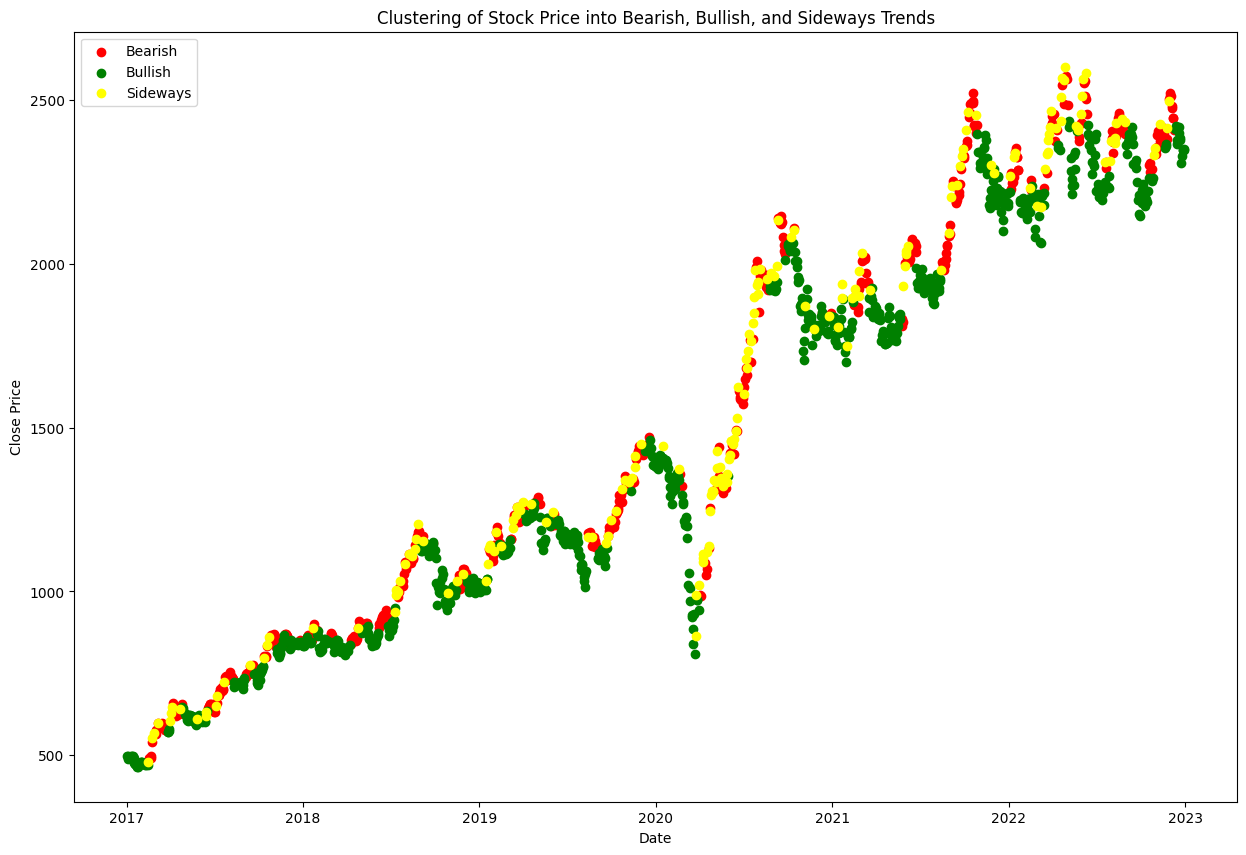

In [ ]:
# Plotting the results
plt.figure(figsize=(15,10))
plt.scatter(p_bearish.index.values, p_bearish['Close'], color='red', label='Bearish')
plt.scatter(p_bullish.index.values, p_bullish['Close'], color='green', label='Bullish')
plt.scatter(p_sideways.index.values, p_sideways['Close'], color='yellow', label='Sideways')
plt.title('Clustering of Stock Price into Bearish, Bullish, and Sideways Trends')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [ ]:
reliance

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,495.568329,498.311340,490.242340,496.071228,477.441376,3548944
2017-01-03,498.242767,501.511505,494.242554,498.037018,479.333282,3217102
2017-01-04,499.637115,499.682831,486.562164,487.865082,469.543365,5196241
2017-01-05,489.625183,493.693939,488.596558,492.551025,474.053345,4367082
2017-01-06,491.088104,496.025513,490.585205,491.430969,472.975342,3922919
...,...,...,...,...,...,...
2022-12-26,2321.113525,2346.265137,2300.484375,2329.697266,2313.644043,2995121
2022-12-27,2335.189209,2352.541504,2321.574951,2348.757324,2332.572998,2881635
2022-12-28,2342.573242,2353.464600,2327.343750,2348.526611,2332.343750,3729696


In [ ]:
def rule_based_trend_decision(moment, trend_cluster):
    """
    Determine the trend using a rule-based approach where moment is given higher priority.

    Parameters:
    - moment: Trend from the 'moment' column (0 for Bearish, 1 for Bullish, 2 for Sideways).
    - trend_cluster: Trend from the 'trend_cluster' column.

    Returns:
    - Final trend decision (0 for Bearish, 1 for Bullish, 2 for Sideways).
    """
    # If both agree, return the agreed trend
    if moment == trend_cluster:
        return moment

    # If moment is bullish and trend_cluster is bearish
    if moment == 1 and trend_cluster == 0:
        return 1  # Prioritize moment's bullish signal

    # If moment is bearish and trend_cluster is bullish
    if moment == 0 and trend_cluster == 1:
        return 0  # Prioritize moment's bearish signal

    # If moment is sideways, consider trend_cluster
    if moment == 2:
        return trend_cluster  # Defer to trend_cluster if moment is sideways

    # In other cases, fallback to moment
    return moment
def apply_trend(row):
    trend_cluster = p.loc[row.name, 'trend_cluster']  # Access the corresponding trend_cluster from DataFrame p
    moment = row['moment']  # Access the moment from the reliance DataFrame
    return weighted_trend_decision(moment, trend_cluster, moment_weight=0.8, trend_cluster_weight=0.2)

# Apply the function across the reliance DataFrame
consistent_trend = reliance.apply(apply_trend, axis=1)


KeyError: 'moment'

In [ ]:
consistent_trend
def segment_and_majority_vote(arr, segment_length=5, threshold=0.5):

    # Initialize the output array
    segmented_arr = np.copy(arr)

    # Loop through the array in steps of segment_length
    for i in range(0, len(arr), segment_length):
        # Extract the current segment
        segment = arr[i:i + segment_length]

        # Find the majority group in the segment
        values, counts = np.unique(segment, return_counts=True)
        max_count = np.max(counts)
        majority_value = values[np.argmax(counts)]

        # Check if the majority value exceeds the threshold
        if max_count / len(segment) >= threshold:
            # Set all elements in the segment to the majority value
            segmented_arr[i:i + segment_length] = majority_value

    return segmented_arr

# Example usage
arr = consistent_trend
segment_length = 50
threshold = 0.8
segmented_arr = segment_and_majority_vote(arr, segment_length, threshold)




NameError: name 'consistent_trend' is not defined

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import plotly.graph_objs as go

# Download Reliance stock data from Yahoo Finance
start_date = '2017-01-01'
end_date = '2023-01-01'
reliance = yf.download('RELIANCE.NS', start=start_date, end=end_date)

# Calculate Ichimoku components
high_9 = reliance['High'].rolling(window=9).max()
low_9 = reliance['Low'].rolling(window=9).min()
tenkan_sen = (high_9 + low_9) / 2

high_26 = reliance['High'].rolling(window=26).max()
low_26 = reliance['Low'].rolling(window=26).min()
kijun_sen = (high_26 + low_26) / 2

senkou_span_a = ((tenkan_sen + kijun_sen) / 2).shift(26)
senkou_span_b = ((high_52 := reliance['High'].rolling(window=52).max()) + (low_52 := reliance['Low'].rolling(window=52).min())) / 2
senkou_span_b = senkou_span_b.shift(26)

# Calculate volatility (Rolling standard deviation of close prices)
volatility = reliance['Close'].rolling(window=20).std()

# Determine market conditions based on consistent_trend
bullish = consistent_trend == 1
bearish = consistent_trend == 0
sideways = consistent_trend == 2

# Create traces for the plot (removed close_trace)
cloud_trace_a = go.Scatter(x=reliance.index, y=senkou_span_a, mode='lines', name='Senkou Span A', line=dict(color='lightgreen'))
cloud_trace_b = go.Scatter(x=reliance.index, y=senkou_span_b, mode='lines', name='Senkou Span B', line=dict(color='lightcoral'), fill='tonexty')
bullish_trace = go.Scatter(x=reliance.index, y=np.where(bullish, reliance['Close'], np.nan), mode='lines', name='Bullish', line=dict(color='green'), opacity=0.5)
bearish_trace = go.Scatter(x=reliance.index, y=np.where(bearish, reliance['Close'], np.nan), mode='lines', name='Bearish', line=dict(color='red'), opacity=0.5)
sideways_trace = go.Scatter(x=reliance.index, y=np.where(sideways, reliance['Close'], np.nan), mode='lines', name='Sideways', line=dict(color='orange'), opacity=0.5)
volatility_trace = go.Scatter(x=reliance.index, y=volatility, mode='lines', name='Volatility', line=dict(color='blue'), yaxis='y2')

# Combine all traces into a list
data = [cloud_trace_a, cloud_trace_b, bullish_trace, bearish_trace, sideways_trace, volatility_trace]

layout = go.Layout(
    title='Reliance Stock Price with Ichimoku Cloud, Consistent Trend, and Volatility',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Price (INR)'),
    yaxis2=dict(title='Volatility', overlaying='y', side='right', range=[0, max(volatility.dropna()) * 5]),
    legend=dict(x=0.03, y=0.97, bordercolor="Black", borderwidth=1),
    showlegend=True
)
fig = go.Figure(data=data, layout=layout)
fig.show()


[*********************100%***********************]  1 of 1 completed


NameError: name 'consistent_trend' is not defined

In [ ]:
import numpy as np

def segment_and_majority_vote(arr, segment_length=5, threshold=0.5):
    segmented_arr = np.copy(arr)

    for i in range(0, len(arr), segment_length):

        segment = arr[i:i + segment_length]

        values, counts = np.unique(segment, return_counts=True)
        max_count = np.max(counts)
        majority_value = values[np.argmax(counts)]

        # Check if the majority value exceeds the threshold
        if max_count / len(segment) >= threshold:
            # Set all elements in the segment to the majority value
            segmented_arr[i:i + segment_length] = majority_value

return segmented_arr



SyntaxError: 'return' outside function (<ipython-input-17-576a8855242a>, line 19)

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from tslearn.clustering import TimeSeriesKMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

def download_data(symbol, start_date, end_date):
    """Download stock data from Yahoo Finance."""
    return yf.download(symbol, start=start_date, end=end_date)

def calculate_ichimoku(df):
    """Calculate Ichimoku components and append them to the DataFrame."""
    high_9 = df['High'].rolling(window=9).max()
    low_9 = df['Low'].rolling(window=9).min()
    df['Tenkan_Sen'] = (high_9 + low_9) / 2

    high_26 = df['High'].rolling(window=26).max()
    low_26 = df['Low'].rolling(window=26).min()
    df['Kijun_Sen'] = (high_26 + low_26) / 2

    df['Senkou_Span_A'] = ((df['Tenkan_Sen'] + df['Kijun_Sen']) / 2).shift(26)
    high_52 = df['High'].rolling(window=52).max()
    low_52 = df['Low'].rolling(window=52).min()
    df['Senkou_Span_B'] = ((high_52 + low_52) / 2).shift(26)

    df['Chikou_Span'] = df['Close'].shift(-26)
    return df

def calculate_macd(df):
    """Calculate MACD and signal line."""
    df['EMA_12'] = df['Close'].ewm(span=12, adjust=False).mean()
    df['EMA_26'] = df['Close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = df['EMA_12'] - df['EMA_26']
    df['MACD_Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()
    return df

def identify_market_conditions(df):
    """Identify bullish, bearish, and sideways market conditions."""
    df['Bullish'] = (df['Close'] > df['Senkou_Span_A']) & (df['Close'] > df['Senkou_Span_B']) & (df['Tenkan_Sen'] > df['Kijun_Sen']) & (df['MACD'] > df['MACD_Signal'])
    df['Bearish'] = (df['Close'] < df['Senkou_Span_A']) & (df['Close'] < df['Senkou_Span_B']) & (df['Tenkan_Sen'] < df['Kijun_Sen']) & (df['MACD'] < df['MACD_Signal'])
    df['Sideways'] = ~(df['Bullish'] | df['Bearish'])
    df['Moment'] = np.where(df['Bullish'], 1, np.where(df['Bearish'], 0, 2))
    return df

def calculate_volatility(df, window=20):
    """Calculate rolling standard deviation (volatility)."""
    df['Volatility'] = df['Close'].rolling(window=window).std()
    return df

def perform_clustering(df):
    """Perform time series clustering on the engineered features."""
    df['Return'] = df['Close'].pct_change()
    df['Momentum'] = df['Close'] - df['Close'].shift(10)
    df['Short_MA'] = df['Close'].rolling(window=20).mean()
    df['Long_MA'] = df['Close'].rolling(window=50).mean()
    df['Trend'] = df['Short_MA'] - df['Long_MA']
    df['RSI'] = 100 - (100 / (1 + df['Close'].diff(1).apply(lambda x: max(x, 0)).rolling(window=14).mean() / df['Close'].diff(1).apply(lambda x: abs(min(x, 0))).rolling(window=14).mean()))

    features = np.column_stack([df['Return'].fillna(0), df['Momentum'].fillna(0), df['Trend'].fillna(0), df['Volatility'].fillna(0), df['RSI'].fillna(50)])

    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)

    model = TimeSeriesKMeans(n_clusters=3, metric="dtw", max_iter=20, n_init=5)
    model.fit(features_scaled)
    df['Trend_Cluster'] = model.labels_
    return df

def rule_based_trend_decision(moment, trend_cluster):
    """Determine the trend using a rule-based approach where moment is given higher priority."""
    if moment == trend_cluster:
        return moment
    if moment == 1 and trend_cluster == 0:
        return 1
    if moment == 0 and trend_cluster == 1:
        return 0
    if moment == 2:
        return trend_cluster
    return moment

def apply_trend_decision(df):
    """Apply rule-based trend decision across the DataFrame."""
    df['Consistent_Trend'] = df.apply(lambda row: rule_based_trend_decision(row['Moment'], df.loc[row.name, 'Trend_Cluster']), axis=1)
    return df

def segment_and_majority_vote(arr, segment_length=5, threshold=0.5):
    """Segment an array and apply majority voting within each segment."""
    segmented_arr = np.copy(arr)
    for i in range(0, len(arr), segment_length):
        segment = arr[i:i + segment_length]
        values, counts = np.unique(segment, return_counts=True)
        max_count = np.max(counts)
        majority_value = values[np.argmax(counts)]
        if max_count / len(segment) >= threshold:
            segmented_arr[i:i + segment_length] = majority_value
    return segmented_arr

def plot_ichimoku_with_trends(df):
    """Plot Ichimoku Cloud with Bullish, Bearish, and Sideways trends."""
    cloud_trace_a = go.Scatter(x=df.index, y=df['Senkou_Span_A'], mode='lines', name='Senkou Span A', line=dict(color='lightgreen'))
    cloud_trace_b = go.Scatter(x=df.index, y=df['Senkou_Span_B'], mode='lines', name='Senkou Span B', line=dict(color='lightcoral'), fill='tonexty')

    bullish_trace = go.Scatter(x=df.index, y=np.where(df['Consistent_Trend'] == 1, df['Close'], np.nan), mode='lines', name='Bullish', line=dict(color='green'), opacity=0.5)
    bearish_trace = go.Scatter(x=df.index, y=np.where(df['Consistent_Trend'] == 0, df['Close'], np.nan), mode='lines', name='Bearish', line=dict(color='red'), opacity=0.5)
    sideways_trace = go.Scatter(x=df.index, y=np.where(df['Consistent_Trend'] == 2, df['Close'], np.nan), mode='lines', name='Sideways', line=dict(color='orange'), opacity=0.5)
    volatility_trace = go.Scatter(x=df.index, y=df['Volatility'], mode='lines', name='Volatility', line=dict(color='blue'), yaxis='y2')

    data = [cloud_trace_a, cloud_trace_b, bullish_trace, bearish_trace, sideways_trace, volatility_trace]

    layout = go.Layout(
        title='Reliance Stock Price with Ichimoku Cloud, Consistent Trend, and Volatility',
        xaxis=dict(title='Date'),
        yaxis=dict(title='Price (INR)'),
        yaxis2=dict(title='Volatility', overlaying='y', side='right'),
        showlegend=True
    )
    fig = go.Figure(data=data, layout=layout)
    fig.show()

# Main execution
start_date = '2017-01-01'
end_date = '2023-01-01'

# Download data
reliance = download_data('RELIANCE.NS', start_date, end_date)

# Perform calculations
reliance = calculate_ichimoku(reliance)
reliance = calculate_macd(reliance)
reliance = identify_market_conditions(reliance)
reliance = calculate_volatility(reliance)
reliance = perform_clustering(reliance)
reliance = apply_trend_decision(reliance)

# Apply segment and majority vote
reliance['Segmented_Trend'] = segment_and_majority_vote(reliance['Consistent_Trend'].values, segment_length=50, threshold=0.8)

# Plot the results
plot_ichimoku_with_trends(reliance)


[*********************100%***********************]  1 of 1 completed
